In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)




Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2945 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1416 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1066 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0859 - accuracy: 0.9735
Epoch 5/5
313/313 [==============================] - 0s 915us/step - loss: 0.0739 - accuracy: 0.9764


[0.07393374294042587, 0.9764000177383423]

In [89]:
import tensorflow as tf
from tensorflow.keras import layers, models
# 데이터 로드 및 전처리
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., tf.newaxis]/255.0, x_test[..., tf.newaxis]/255.0

# CNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.23),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 모델 평가
model.evaluate(x_test, y_test)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1607 - accuracy: 0.9498 - val_loss: 0.0437 - val_accuracy: 0.9864
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0380 - val_accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0256 - val_accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9913


[0.027132192626595497, 0.9912999868392944]

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

x_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
x_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


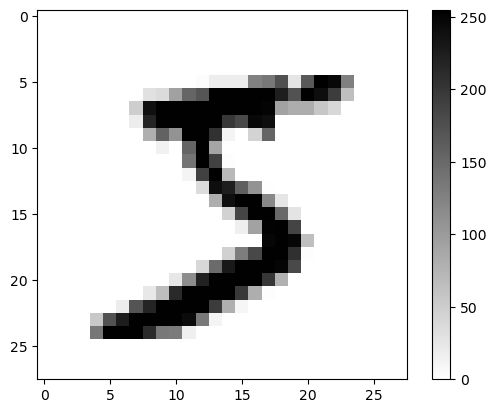

In [4]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print(f'x_train.shape={x_train.shape}') 
print(f'y_train.shape={y_train.shape}') 
print(f'x_test.shape={x_test.shape}') 
print(f'y_test.shape={y_test.shape}') 



plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [5]:
y_train[0]

5

In [88]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [64]:
from PIL import ImageGrab, ImageTk, Image
import tkinter as tk
import io
import numpy as np

def draw(event):
    x, y = event.x, event.y
    draw_area.create_oval(x, y, x+15, y+15, fill="black") # 붓 크기, 색

def convert_to_array():
    # 캔버스 이미지를 스크린샷으로 찍기
    screenshot = ImageGrab.grab(bbox=(draw_area.winfo_rootx(), draw_area.winfo_rooty(), 
                                     draw_area.winfo_rootx() + draw_area.winfo_width(), 
                                     draw_area.winfo_rooty() + draw_area.winfo_height()))
    # 이미지 크기를 28x28로 조정
    screenshot = screenshot.resize((28, 28), Image.LANCZOS)
    # 이미지를 흑백으로 변환하여 배열로 변환
    image_array = np.array(screenshot.convert('L'))
    # 이미지 반전
    image_array = 255 - image_array
    return image_array

def predict_digit():
    image_array = convert_to_array()
    normalized_image = image_array / 255.0
    
    # 이미지를 Tkinter 창에 표시
    img = Image.fromarray(image_array.astype(np.uint8))
    img = img.resize((image_array.shape[1]*10, image_array.shape[0]*10))
    img = ImageTk.PhotoImage(img)
    image_label.img = img
    image_label.config(image=img)
    
    # CNN 모델에서 예측을 위해 4차원 배열로 변경 (배치 크기 1 추가)
    input_image = np.expand_dims(normalized_image, axis=(0, -1))

    # 모델을 사용하여 예측
    prediction = model.predict(input_image)
    
    # 가장 높은 확률을 갖는 클래스의 인덱스 가져오기
    predicted_class_index = np.argmax(prediction)

    # 예측 결과 출력
    text_label.config(text=f"Predicted class: {predicted_class_index}")
    
def clear():
    draw_area.delete("all")


root = tk.Tk()
root.title("Handwritten Digit Recognition")

canvas_width = 280
canvas_height = 280

draw_area = tk.Canvas(root, width=canvas_width, height=canvas_height, bg="white")
draw_area.grid(row=0, column=0, padx=10, pady=10, columnspan=2)

draw_area.bind("<B1-Motion>", draw)

image_label = tk.Label(root, image=None)
image_label.grid(row=0, column=2, padx=10, pady=10)

text_label = tk.Label(root, text="")
text_label.grid(row=1, column=2, padx=10, pady=10)

predict_button = tk.Button(root, text="Predict Digit", command=predict_digit)
predict_button.grid(row=1, column=0, padx=10, pady=10, sticky="e")

clear_button = tk.Button(root, text="Clear", command=clear)
clear_button.grid(row=1, column=1, padx=10, pady=10, sticky="w")

root.mainloop()


![숫자손글씨](숫자손글씨.png)

In [81]:
# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model_simple = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_good =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [85]:
model = model_good # model_simple 

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 25)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 1, 1, 64)        

In [86]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3016 - accuracy: 0.1122
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1135
테스트 정확도: 0.11349999904632568


313/313 [==============================] - 0s 1ms/step


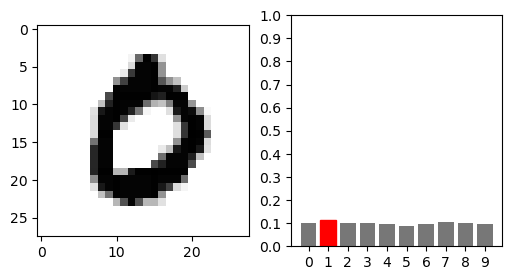

In [84]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(x_test[3], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.xticks(range(10))
plt.yticks(np.arange(0, 1.1, 0.1))
thisplot = plt.bar(range(10), predictions[3], color="#777777")
plt.ylim([0, 1])

predicted_label = np.argmax(predictions[3])
thisplot[predicted_label].set_color('red')

plt.show()